# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [57]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# Files to load
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [58]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [59]:
#  1. Get the total rides for each city type
type_ride_count = pyber_data_df.groupby(["type"]).count()["ride_id"]
type_ride_count


type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [60]:
# 2. Get the total drivers for each city type
unique_city_df = pyber_data_df.drop_duplicates(subset=['city'])

type_driver_count = unique_city_df.groupby(["type"]).sum()["driver_count"]
type_driver_count

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [61]:
#  3. Get the total amount of fares for each city type
type_total_fares = pyber_data_df.groupby(["type"]).sum()["fare"]
type_total_fares

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [62]:
#  4. Get the average fare per ride for each city type. 
type_avg_fares = type_total_fares / type_ride_count
type_avg_fares

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
dtype: float64

In [63]:
# 5. Get the average fare per driver for each city type. 
type_avg_fare_driver = type_total_fares / type_driver_count
type_avg_fare_driver

type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64

In [64]:
#  6. Create a PyBer summary DataFrame. 
pyber_summary_df = pd.concat({ 'Total Rides': type_ride_count,
                    'Total Drivers': type_driver_count,
                    'Total Fares' : type_total_fares,
                    'Average Fare per Ride' : type_avg_fares,
                    'Average Fare per Driver' : type_avg_fare_driver },axis=1)

pyber_summary_df = pyber_summary_df[["Total Rides","Total Drivers", "Total Fares", "Average Fare per Ride", "Average Fare per Driver"]]
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
type,,,,,
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [65]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None

In [66]:
pyber_summary_formatted_df = pyber_summary_df
pyber_summary_formatted_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [67]:
#  8. Format the columns.

pyber_summary_formatted_df["Total Rides"] = pyber_summary_formatted_df["Total Rides"].map("{:,}".format)
pyber_summary_formatted_df["Total Drivers"] = pyber_summary_formatted_df["Total Drivers"].map("{:,}".format)
pyber_summary_formatted_df["Total Fares"] = pyber_summary_formatted_df["Total Fares"].map("${:,.2f}".format)
pyber_summary_formatted_df["Average Fare per Ride"] = pyber_summary_formatted_df["Average Fare per Ride"].map("${:,.2f}".format)
pyber_summary_formatted_df["Average Fare per Driver"] = pyber_summary_formatted_df["Average Fare per Driver"].map("${:,.2f}".format)

pyber_summary_formatted_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,"1,625","2,405","$39,854.38",$24.53,$16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [68]:
# 1. Read the merged DataFrame
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

In [69]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
new_ind_pyber_data_df = pd.DataFrame(pyber_data_df.groupby(['city','type','date'])['fare'].sum())
new_ind_pyber_data_df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 2375 entries, (Amandaburgh, Urban, 2019-01-02 09:57:04) to (Williamsview, Urban, 2019-05-04 14:56:45)
Data columns (total 1 columns):
fare    2375 non-null float64
dtypes: float64(1)
memory usage: 47.5+ KB


In [70]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
# df = df.reset_index()
new_ind_pyber_data_df = new_ind_pyber_data_df.reset_index()
new_ind_pyber_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2375 entries, 0 to 2374
Data columns (total 4 columns):
city    2375 non-null object
type    2375 non-null object
date    2375 non-null object
fare    2375 non-null float64
dtypes: float64(1), object(3)
memory usage: 74.3+ KB


In [71]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
new_ind_pyber_data_df.pivot(index = 'date', columns = 'type', values='fare')
new_ind_pyber_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2375 entries, 0 to 2374
Data columns (total 4 columns):
city    2375 non-null object
type    2375 non-null object
date    2375 non-null object
fare    2375 non-null float64
dtypes: float64(1), object(3)
memory usage: 74.3+ KB


In [72]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.

mask = (new_ind_pyber_data_df['date'] > '2019-01-01') & (new_ind_pyber_data_df['date'] <= '2019-04-28')
date_pyber_data_df = new_ind_pyber_data_df.loc[mask].pivot(index = 'date', columns = 'type', values='fare')
date_pyber_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2177 entries, 2019-01-01 00:08:16 to 2019-04-27 23:52:44
Data columns (total 3 columns):
Rural       114 non-null float64
Suburban    567 non-null float64
Urban       1496 non-null float64
dtypes: float64(3)
memory usage: 68.0+ KB


In [73]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
# df.index = pd.to_datetime(df.index)
date_pyber_data_df.index = pd.to_datetime(date_pyber_data_df.index)


In [74]:
# 7. Check that the datatype for the index is datetime using df.info()
date_pyber_data_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2177 entries, 2019-01-01 00:08:16 to 2019-04-27 23:52:44
Data columns (total 3 columns):
Rural       114 non-null float64
Suburban    567 non-null float64
Urban       1496 non-null float64
dtypes: float64(3)
memory usage: 68.0 KB


In [75]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
resample_date_pyber_data_df = date_pyber_data_df.resample("W").sum()
resample_date_pyber_data_df                                   

type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


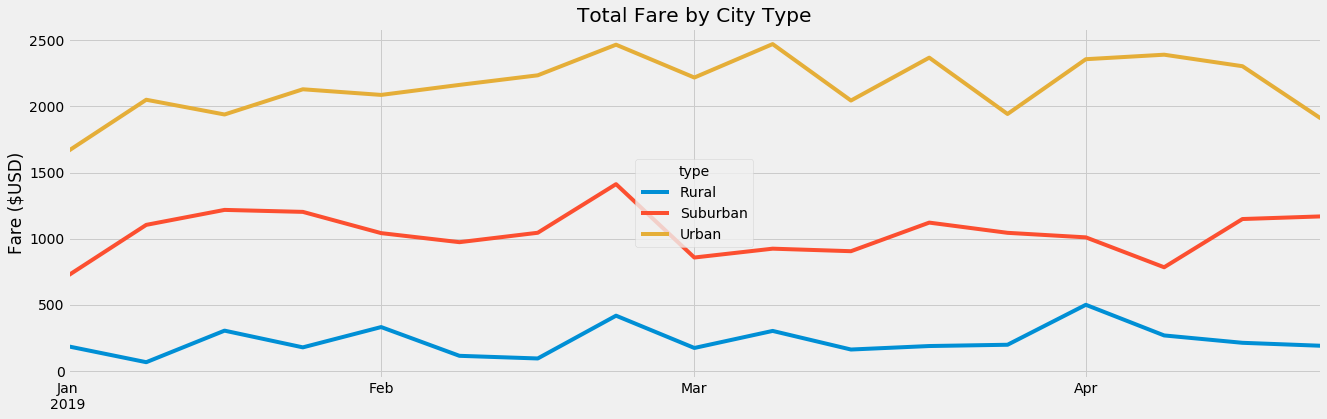

<Figure size 432x288 with 0 Axes>

In [76]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
plt.style.use('fivethirtyeight')

resample_pyber_data = resample_date_pyber_data_df.plot(figsize = (20,6))

# Add a title 
resample_pyber_data.set_title("Total Fare by City Type")
#  Add a x- and y-axis label.
resample_pyber_data.set_xlabel("")
resample_pyber_data.set_ylabel("Fare ($USD)")

# Save to .png file
plt.savefig('Analysis/Pyber_fare_summary.png')

plt.show()
plt.tight_layout()